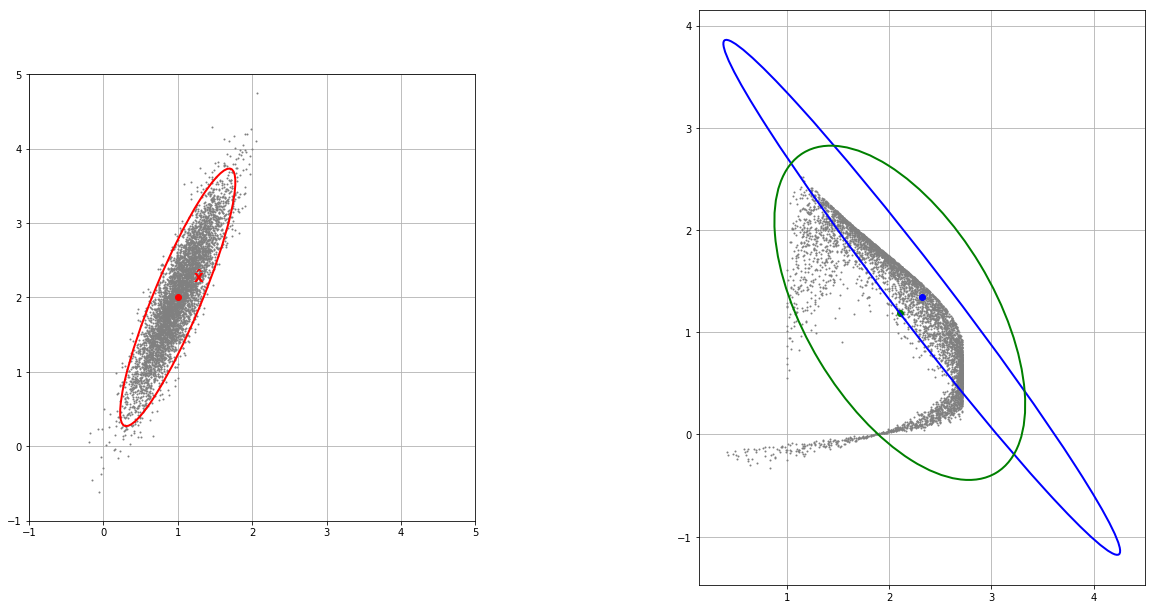

In [34]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Ellipse
import scipy


def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]



# x = exp(sin(x**2))
# y = cos(x)*exp(sin(y))


def function_x(x,y):
#    return .5*x+.3*y
   return np.exp(np.sin(x*x))

def function_y(x,y):
#    return .3*y-x
    return np.cos(x)*np.exp(np.sin(y))

def Jacobian(x,y):
#    J11 = .5
#    J12 = .3
#    J21 = -1
#    J22 = .3
    
    J11 = 2*x0*np.exp(np.sin(x*x))*np.cos(x*x)
    J12 = 0.0
    J21 = -np.sin(x)*np.exp(np.sin(y))
    J22 = np.cos(x)*np.cos(y)*np.exp(np.sin(y))
    return np.array([[J11,J12], [J21, J22]])




cov=np.array([[0.1, 0.2], [0.2, 0.5]])
x0=1;
y0=2;
x, y = np.random.multivariate_normal([x0, y0], cov, 5000).T

    
plt.figure(figsize=(20,40))
a=plt.subplot(121,aspect=1)
plt.xlim([-1,5])
plt.ylim([-1,5])
plt.xticks(np.arange(-1,6,1))
plt.yticks(np.arange(-1,6,1))
plt.grid(True)
plt.plot(x,y,'.',color='grey',markersize=2)
plt.plot(x0,y0,"ro")
vals, vecs = eigsorted(cov)
theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
w, h = 2 * np.sqrt(5.991*vals)
e=Ellipse(xy=[x0, y0], width=w, height=h, angle=theta, edgecolor='r', fc='None', lw=2,zorder=10)
a.add_patch(e)
a.text(1.2, 2.2, r'$\bf{\hat{x}}$', fontsize=15,color='r')

xf=function_x(x,y)
yf=function_y(x,y)
x0f=function_x(x0,y0)
y0f=function_y(x0,y0)
J=Jacobian(x0,y0)
b = np.array([x,y])
xys= J.dot(b)
b0 = np.array([x0,y0])
xy0s= J.dot(b0)
cov2= J.dot(cov.dot(J.T))

a=plt.subplot(122,aspect=1)
#plt.xlim([-1,5])
#plt.ylim([-1,5])
plt.xticks(np.arange(-1,6,1))
plt.yticks(np.arange(-1,6,1))
plt.grid(True)
plt.plot(xf,yf,'.',color='grey',markersize=2)
plt.plot(x0f,y0f,"bo")

vals, vecs = eigsorted(cov2)
theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
w, h = 2 * np.sqrt(5.991*vals)
e=Ellipse(xy=[x0f,y0f], width=w, height=h, angle=theta, edgecolor='b', fc='None', lw=2,zorder=10)
a.add_patch(e)
plt.subplots_adjust(wspace=0.5)


cov3=np.cov(xf,yf)
vals, vecs = eigsorted(cov3)
theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
w, h = 2 * np.sqrt(5.991*vals)
e=Ellipse(xy=[np.mean(xf),np.mean(yf)], width=w, height=h, angle=theta, edgecolor='g', fc='None', lw=2,zorder=10)
a.add_patch(e)
plt.subplots_adjust(wspace=0.5)
plt.plot(np.mean(xf),np.mean(yf),"go")

plt.show()



Now do the same with the unscented transform

[1.         1.40249224 1.         0.59750776 1.        ]
[2.         2.80498447 2.40249224 1.19501553 1.59750776]


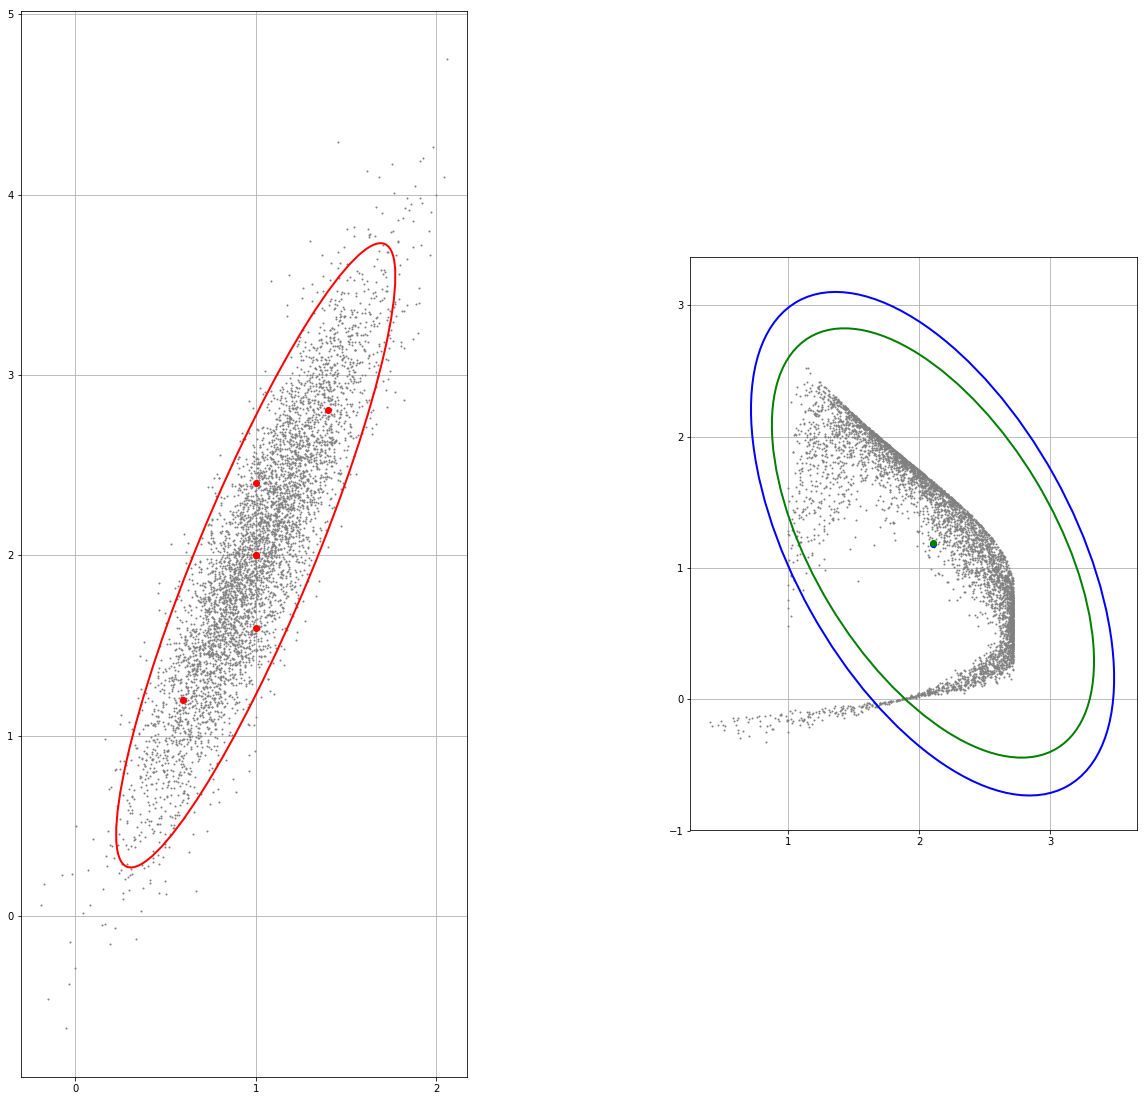

In [35]:
def merwe_sigma_function(x, P, alpha=1e-3, beta=2, kappa=0):
    n = len(x)
    l = alpha**2 * (n+kappa)
    X = scipy.linalg.cholesky(l*P)
    sigma_points = np.zeros((2*n+1, n))
    sigma_points[0] = x
    sigma_points[1:n+1, :] = x + X
    sigma_points[n+1:, :] = x - X
    l -= n
    mean_weights = np.full(2*n + 1, .5 / (n + l))
    cov_weights = np.full(2*n + 1, .5 / (n + l))
    mean_weights[0] = l / (n + l)
    cov_weights[0] = l / (n + l) + (1 - alpha**2 + beta)
    return sigma_points, mean_weights, cov_weights

def unscented_transform(f_of_sigma, mean_weights, cov_weights):
    x = np.dot(mean_weights, f_of_sigma)
    res = f_of_sigma - x[np.newaxis, :]
    P = res.T.dot(np.diag(cov_weights)).dot(res)
    return x, P

x_array = np.array([x0,y0])

[sigma_points, mean_weights, cov_weights] =merwe_sigma_function(x_array.T,cov,alpha=.9,kappa=0)

print(sigma_points[:,0])
print(sigma_points[:,1])

f_of_sigma=np.array([function_x(sigma_points[:,0],sigma_points[:,1]),function_y(sigma_points[:,0],sigma_points[:,1])])


[xys,cov2]= unscented_transform(f_of_sigma.T, mean_weights, cov_weights)

plt.figure(figsize=(20,40))
a=plt.subplot(121,aspect=1)
#plt.xlim([-1,5])
#plt.ylim([-1,5])
plt.xticks(np.arange(-1,6,1))
plt.yticks(np.arange(-1,6,1))
plt.grid(True)
plt.plot(x,y,'.',color='grey',markersize=2)
plt.plot(x0,y0,"ro")
plt.plot(sigma_points[:,0],sigma_points[:,1],"ro")
vals, vecs = eigsorted(cov)
theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
w, h = 2 * np.sqrt(5.991*vals)
e=Ellipse(xy=[x0, y0], width=w, height=h, angle=theta, edgecolor='r', fc='None', lw=2,zorder=10)
a.add_patch(e)



a=plt.subplot(122,aspect=1)
#plt.xlim([-1,5])
#plt.ylim([-1,5])
plt.xticks(np.arange(-1,6,1))
plt.yticks(np.arange(-1,6,1))
plt.grid(True)
plt.plot(xf,yf,'.',color='grey',markersize=2)
plt.plot(xys[0],xys[1],"bo")

vals, vecs = eigsorted(cov2)
theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
w, h = 2 * np.sqrt(5.991*vals)
e=Ellipse(xy=xys, width=w, height=h, angle=theta, edgecolor='b', fc='None', lw=2,zorder=10)
a.add_patch(e)
plt.subplots_adjust(wspace=0.5)


cov3=np.cov(xf,yf)
vals, vecs = eigsorted(cov3)
theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
w, h = 2 * np.sqrt(5.991*vals)
e=Ellipse(xy=[np.mean(xf),np.mean(yf)], width=w, height=h, angle=theta, edgecolor='g', fc='None', lw=2,zorder=10)
a.add_patch(e)
plt.subplots_adjust(wspace=0.5)
plt.plot(np.mean(xf),np.mean(yf),"go")
plt.show()


